# Thuật toán Decision tree cho bài toán phân loại

Cây quyết định (Decision Tree) là một mô hình học máy được sử dụng rộng rãi trong cả phân loại (classification) và hồi quy (regression). Đây là một công cụ trực quan giúp biểu diễn các quyết định và các hậu quả có thể xảy ra của các quyết định đó. Cây quyết định bao gồm các thành phần chính sau:

1. **Nút gốc (Root Node):** Đây là điểm bắt đầu của cây quyết định, chứa toàn bộ dữ liệu huấn luyện. Nút gốc được chia thành các nhánh dựa trên các đặc trưng của dữ liệu.
2. **Nút lá (Leaf Nodes):** Đây là các nút cuối cùng của cây, không chia nhánh thêm nữa. Mỗi nút lá đại diện cho một quyết định hoặc một giá trị dự đoán.
3. **Nút trong (Internal Nodes):** Đây là các nút nằm giữa nút gốc và nút lá, chứa các điều kiện kiểm tra trên các đặc trưng của dữ liệu.
4. **Cành (Branches):** Các cành nối giữa các nút, biểu thị các quyết định hoặc điều kiện dẫn đến các nhánh tiếp theo.

### Quá trình xây dựng cây quyết định

Quá trình xây dựng cây quyết định bao gồm các bước sau:

1. **Chọn thuộc tính phân chia (Splitting Attribute):** Chọn một thuộc tính của dữ liệu để phân chia tập dữ liệu tại nút hiện tại. Thuộc tính này được chọn dựa trên các tiêu chí như chỉ số Gini, Entropy, hoặc phương sai.
2. **Tạo các nhánh:** Phân chia tập dữ liệu thành các tập con dựa trên giá trị của thuộc tính phân chia.
3. **Đệ quy:** Áp dụng quá trình chọn thuộc tính và tạo nhánh cho từng tập con cho đến khi một điều kiện dừng được thỏa mãn (chẳng hạn như độ sâu cây đạt giới hạn, hoặc tất cả các điểm dữ liệu trong tập con thuộc cùng một lớp).


## Thuật toán ID3
1. **Chọn thuộc tính gốc**:
   - Tính entropy của toàn bộ tập dữ liệu.
   - Tính gain thông tin (information gain) cho mỗi thuộc tính. (hoặc tính Gini Index)
   - Chọn thuộc tính có gain thông tin cao nhất làm nút gốc (root node).

2. **Phân chia tập dữ liệu**:
   - Phân chia tập dữ liệu thành các tập con dựa trên giá trị của thuộc tính được chọn.
   - Mỗi giá trị của thuộc tính sẽ tạo ra một nhánh con.

3. **Tạo nút con**:
   - Với mỗi tập con, lặp lại quá trình tính entropy và gain thông tin để chọn thuộc tính tiếp theo.
   - Quá trình này tiếp tục đệ quy cho đến khi đạt một trong các điều kiện dừng:
     - Tất cả các mẫu trong tập con thuộc cùng một lớp.
     - Không còn thuộc tính nào để phân chia (các thuộc tính đã được sử dụng hết).
     - Số lượng mẫu trong tập con quá nhỏ để tiếp tục phân chia.

4. **Gán nhãn cho các nút lá**:
   - Nếu một nút lá chứa các mẫu thuộc nhiều lớp, gán nhãn của lớp phổ biến nhất cho nút lá đó.

### Entropy
Cho phân phối xác suất $\mathbf{p} = (p_1,..., p_n)$, $\sum_{i = 1}^{n}(p_i) = 1$. Entropy của phân phối xác suất này được tính như sau: \\
$$
 H(\mathbf{p}) = - \sum_{i=1}^{n} p_i \log{(p_i)}
$$


### Phương pháp Information Gain
- IG là thước đo độ chênh lệch entropy từ trước đến sau tập 𝑆 được phân chia trên thuộc tính 𝐴 . Nói cách khác, mức độ không chắc chắn trong 𝑆 đã giảm đi bao nhiêu sau khi tách tập 𝑆 trên thuộc tính 𝐴 .

- Để tính entropy (thông tin trung bình) cần thiết để phân loại các lớp trong tập dữ liệu $\mathbf{D}$, chúng ta sử dụng công thức sau:
  $$ Info(\mathbf{D}) = - \sum_{c=1}^C \frac{N_c}{N} \log{\left( \frac{N_c}{N} \right)} $$
  Trong đó:
  - $c = 1, 2, \ldots, C$ là các lớp trong tập dữ liệu $\mathbf{D}$.
  - $N_c$ là số lượng dữ liệu thuộc lớp $c$.
  - $N = |\mathbf{D}|$ là tổng số dữ liệu trong $\mathbf{D}$.

- Để tính lượng thông tin cần thiết để phân loại chính xác các giá trị của mỗi thuộc tính, giả sử xét thuộc tính $\mathbf{A}$ có các giá trị $\{a_1, \ldots, a_k\}$. Thuộc tính $\mathbf{A}$ chia tập dữ liệu thành các tập con $\mathbf{D}_1, \ldots, \mathbf{D}_k$. Khi đó, thông tin cho thuộc tính $\mathbf{A}$ được tính bằng:
  $$ Info(\mathbf{A}, \mathbf{D}) = \sum_{i=1}^k \frac{|\mathbf{D}_i|}{N} \, Info(\mathbf{D}_i) $$
  
- Information Gain cho thuộc tính $\mathbf{A}$ được tính bằng công thức:
  $$ G(\mathbf{A}) = Info(\mathbf{D}) - Info(\mathbf{A}, \mathbf{D}) $$
  
- Chọn thuộc tính để phân chia dựa trên $\arg \max_{\mathbf{A}} G(\mathbf{A})$ hoặc $\arg \min_{\mathbf{A}} Info(\mathbf{A}, \mathbf{D})$.


### Phương pháp Gini Index
- Độ đo sự không thuần nhất của tập dữ liệu $\mathbf{D}$:
  $$ Gini(\mathbf{D}) = 1 - \sum_{c = 1}^C p_c ^2 $$
  
  Trong đó:
  - $C$ là số class thuộc tập $\mathbf{D}$
  - $p_c$ là xác suất 1 mẫu dữ liệu trong $\mathbf{D}$ thuộc class $c$
    
- Để tính Gini Index cho thuộc tính $\mathbf{A}$ trong tập dữ liệu $\mathbf{D}$, chia thành các tập con $\mathbf{D}_1, \ldots, \mathbf{D}_k$ theo các giá trị của thuộc tính $\mathbf{A}$, Gini sau khi phân chia dựa trên thuộc tính $A$:
  $$ Gini(\mathbf{A}, \mathbf{D}) = \sum_{i=1}^k \frac{|\mathbf{D}_i|}{N} \, Gini(\mathbf{D}_i) $$

- Gini Gain (hay độ giảm gini sau khi phân chia) cho thuộc tính $\mathbf{A}$ được tính bằng công thức:
  $$ GG(\mathbf{A}) = Gini(\mathbf{D}) - Gini(\mathbf{A}, \mathbf{D}) $$

- Chọn thuộc tính để phân chia dựa trên $\arg \max_{\mathbf{A}} GG(\mathbf{A})$.

### Dữ liệu liên tục
- Với các thuộc tính dữ liệu liên tục: 
    + Sắp xếp dữ liệu tăng dần
    + Thực hiện chọn ngưỡng phân chia dữ liệu thành 2 phần (ngưỡng thường dùng là trung bình 2 điểm dữ liệu liên tiếp)
    + Thực hiện tính Gain (hoặc Gini), chọn ngưỡng phân chia tốt nhất
    + So sánh với các thuộc tính khác và chọn thuộc tính phân chia

### Điều kiện dừng 
- Node đó có số phần tử nhỏ hơn 1 ngưỡng nào đó
- Cây đạt độ sâu nhất định
- Việc phân chia node đó không làm giảm entropy quá nhiều
- Cây quá nhiều leaf node 

# Ví dụ

In [20]:
import numpy as np
import pandas as pd
from collections import Counter

class Node:
    def __init__(self, entropy=0, children=None, depth=0, ids=None):
        self.ids = ids
        self.entropy = entropy
        self.children = children if children is not None else []
        self.depth = depth
        self.split_feature = None
        self.order = None
        self.label = None

    def set_feature(self, split_feature, order):
        self.split_feature = split_feature
        self.order = order

    def set_label(self, label):
        self.label = label

    def is_leaf(self):
        return not self.children


class DecisionTree:
    def __init__(self, max_depth=10, min_size_node=3, max_leaf_node=15, min_gain=1e-4, min_samples_split=3):
        self.max_depth = max_depth
        self.min_size_node = min_size_node
        self.max_leaf_node = max_leaf_node
        self.min_samples_split = min_samples_split
        self.min_gain = min_gain
        self.root = None
        self.X = None
        self.y = None

    def entropy(self, ids):
        unique_elements, counts = np.unique(self.y[ids], return_counts=True)
        prob = counts / counts.sum()
        return -np.sum(prob * np.log2(prob))

    def information_gain(self, feature_index, ids):
        feature_values = self.X[ids, feature_index]
        unique_elements, counts = np.unique(feature_values, return_counts=True)
        weighted_entropy = 0
        for i, value in enumerate(unique_elements):
            sub_ids = ids[np.where(feature_values == value)[0]]
            weighted_entropy += counts[i] / counts.sum() * self.entropy(sub_ids)
        return self.entropy(ids) - weighted_entropy

    def _set_label(self, node):
        target_ids = node.ids
        y_values = self.y[target_ids]
        
        counts = Counter(y_values)
        mode, _ = counts.most_common(1)[0]
        
        node.set_label(mode)

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame): X = X.values
        if isinstance(y, pd.Series): y = y.values
        self.label = np.unique(y)
        self.X = X
        self.y = y

        self.root = Node(ids=np.arange(len(y)), entropy=self.entropy(np.arange(len(y))), depth=0)

        queue = [self.root]
        while queue:
            node = queue.pop(0)
            if node.depth < self.max_depth and node.entropy >= self.min_gain:
                node.children = self._split(node)
                if not node.children: 
                    self._set_label(node)
                else:
                    queue.extend(node.children)
            else:
                self._set_label(node)

    def _split(self, node):
        best_gain = 0
        best_splits = []
        best_feature = None
        order = None
        ids = node.ids
        features = self.X.shape[1]
        
        for i in range(features):
            feature_values = self.X[ids, i]
            unique_values = np.unique(feature_values)
            if len(unique_values) == 1: continue 
                
            splits = []
            for value in unique_values: 
                split_ids = ids[feature_values == value]
                splits.append(split_ids)
                
            if min(map(len, splits)) < self.min_samples_split: continue

            gain = self.information_gain(feature_index=i, ids=ids)
            
            if gain < self.min_gain: continue  
                
            if gain > best_gain:
                best_gain = gain 
                best_splits = splits
                best_feature = i
                order = unique_values
                
        if best_gain > 0:
            node.set_feature(best_feature, order)
            child_nodes = [Node(ids=split, entropy=self.entropy(split), depth=node.depth + 1) for split in best_splits]
            return child_nodes
        else:
            return []

    def predict(self, new_data):
        if isinstance(new_data, pd.DataFrame):
            new_data = new_data.values
        npoints = new_data.shape[0]
        labels = [None] * npoints
        for n in range(npoints):
            x = new_data[n, :] 
            node = self.root
            while node.children: 
                feature_value = x[node.split_feature]
                if feature_value not in node.order:
                    labels[n] = None 
                    break
                
                index = np.where(node.order == feature_value)[0]
                if len(index) == 0:
                    labels[n] = None  
                    break
                
                index = index[0]
                node = node.children[index]
            
            labels[n] = node.label
        return labels


In [3]:

data = pd.read_csv('car_evaluation.csv')

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [4]:
X = pd.get_dummies(X)

In [5]:
X.head()

,vhigh_high,vhigh_low,vhigh_med,vhigh_vhigh,vhigh.1_high,vhigh.1_low,vhigh.1_med,vhigh.1_vhigh,2_2,2_3,...,2_5more,2.1_2,2.1_4,2.1_more,small_big,small_med,small_small,low_high,low_low,low_med
0,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,False,True
1,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,False,True,True,False,False
2,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
3,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True
4,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,True,False,True,False,False


In [6]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
tree = DecisionTree(min_size_node=10, max_leaf_node=10, min_gain=1e-4, min_samples_split=30)
tree.fit(X_train, y_train)
pre = tree.predict(X_test)
accuracy_score(pre, y_test)

0.8901734104046243

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Đánh giá độ chính xác sử dụng thư viện Sklearn
sk_model = DecisionTreeClassifier( criterion= 'entropy', max_leaf_nodes= 10)
sk_model.fit(X_train, y_train)
sk_preds = sk_model.predict(X_test)
accuracy_score(y_test, sk_preds)

0.8901734104046243

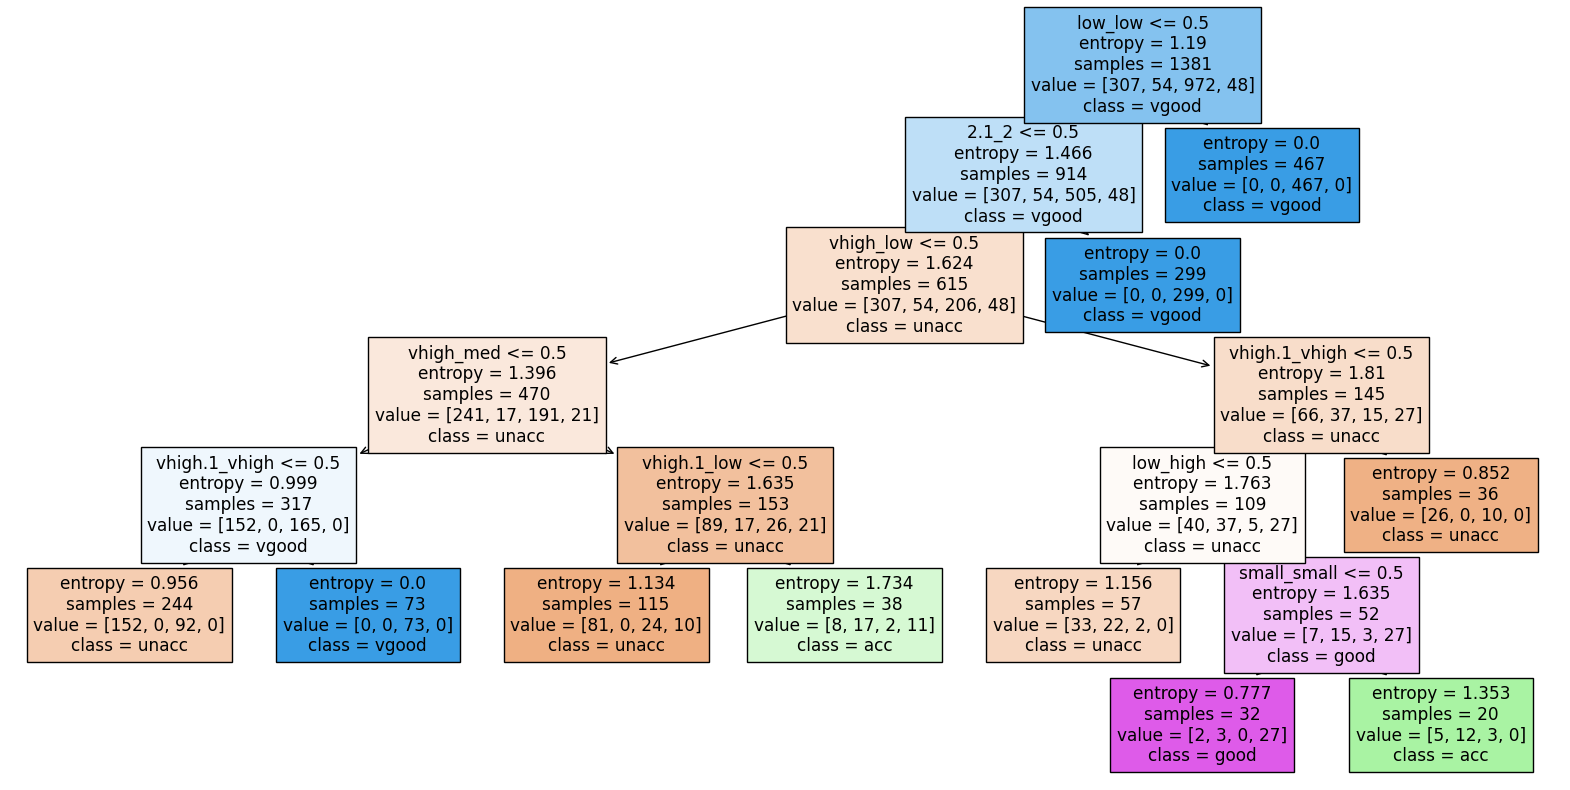

In [81]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(sk_model, feature_names=list(X_train.columns), class_names=y.unique(), filled=True)
plt.show()